In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Get the file from the link and read
#-O is used to write the data to a file ie. the name of the file follows the command

!wget https://raw.githubusercontent.com/twakjira/HoT-AML/main/Data/Regression/Dataset1/water_quality_data.xlsx -O water_quality_data.xlsx

#The datafile variable is used to refer to the data which is being read from the 'water_quality_data.xlsx which was also gotten from a source

datafile = pd.read_excel('water_quality_data.xlsx')


datafile


--2024-10-24 06:49:10--  https://raw.githubusercontent.com/twakjira/HoT-AML/main/Data/Regression/Dataset1/water_quality_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715493 (699K) [application/octet-stream]
Saving to: ‘water_quality_data.xlsx’

water_quality_data. 100%[===================>] 698.72K  3.50MB/s    in 0.2s    

2024-10-24 06:49:11 (3.50 MB/s) - ‘water_quality_data.xlsx’ saved [715493/715493]



AMN     BOD     CHL     DIN     MRP     TEMP    TRAN    WQM
0      0.0547  2.7414  0.3918 -1.1843  0.0138  15.3787 -0.7015  59.96
1      0.0975 -0.1555  3.3506  0.4513  0.0179  15.3255  0.7867  80.38
2      0.0285  1.8100  0.9376 -0.8826  0.0213  16.6987  0.6579  71.40
3      0.0354  2.3163  3.7961     NaN  0.0271  12.3391  1.3615    NaN
4      0.0354  2.3163  2.7961  0.1448  0.0271  14.3391  1.3615  95.40
...       ...     ...     ...     ...     ...      ...     ...    ...
10018  0.1964  2.5177  5.5248  1.6532  0.0382  15.2260  1.2929  79.67
10019  0.0185  1.3208  8.2974  3.1859  0.0233  14.0154  0.6657  66.22
10020  0.0123  0.8134  7.2183     NaN  0.4078  15.5306  0.5961    NaN
10021  0.0613  1.1147  3.5711  0.5732  0.0117  15.5926  2.7992  88.07
10022  0.0992  2.0890  2.0726 -0.2551  0.0181  15.8386  2.9012  83.64

[10023 rows x 8 columns]

In [4]:
# Display first few rows of data (default =5)

datafile.head()


AMN     BOD     CHL     DIN     MRP     TEMP    TRAN    WQM
0  0.0547  2.7414  0.3918 -1.1843  0.0138  15.3787 -0.7015  59.96
1  0.0975 -0.1555  3.3506  0.4513  0.0179  15.3255  0.7867  80.38
2  0.0285  1.8100  0.9376 -0.8826  0.0213  16.6987  0.6579  71.40
3  0.0354  2.3163  3.7961     NaN  0.0271  12.3391  1.3615    NaN
4  0.0354  2.3163  2.7961  0.1448  0.0271  14.3391  1.3615  95.40

In [5]:
# Display last few rows of the data

datafile.tail()


AMN     BOD     CHL     DIN     MRP     TEMP    TRAN    WQM
10018  0.1964  2.5177  5.5248  1.6532  0.0382  15.2260  1.2929  79.67
10019  0.0185  1.3208  8.2974  3.1859  0.0233  14.0154  0.6657  66.22
10020  0.0123  0.8134  7.2183     NaN  0.4078  15.5306  0.5961    NaN
10021  0.0613  1.1147  3.5711  0.5732  0.0117  15.5926  2.7992  88.07
10022  0.0992  2.0890  2.0726 -0.2551  0.0181  15.8386  2.9012  83.64

DATA ANALYSIS AND PROCESSING

In [6]:
#check the shape of the data

datafile.shape


(10023, 8)

In [7]:
#checking for missing values This Line checks for all missing values and sums them up to get the total number of missing values
missingValues = datafile.isnull().sum()

#Display total number of missing Values for each coloumn

print("Missing Values in Each Coloumn")
missingValues

Missing Values in Each Coloumn


AMN     1
BOD     3
CHL     0
DIN     3
MRP     1
TEMP    2
TRAN    2
WQM     7
dtype: int64

In [8]:
#Data Cleaning starts here. Remove all the rows and coloumns with missing Vallue

cleanDatafile = datafile.dropna()


#Check if the deletion worked

print(" The Data without duplicates are")
cleanDatafile

 The Data without duplicates are


AMN     BOD     CHL     DIN     MRP     TEMP    TRAN    WQM
0      0.0547  2.7414  0.3918 -1.1843  0.0138  15.3787 -0.7015  59.96
1      0.0975 -0.1555  3.3506  0.4513  0.0179  15.3255  0.7867  80.38
2      0.0285  1.8100  0.9376 -0.8826  0.0213  16.6987  0.6579  71.40
4      0.0354  2.3163  2.7961  0.1448  0.0271  14.3391  1.3615  95.40
5      0.0290  1.2430  9.2195  3.6956  0.0218  15.8452 -0.4257  51.95
...       ...     ...     ...     ...     ...      ...     ...    ...
10017  0.2171  1.4146  7.2014  2.5800  0.0033  15.8676 -0.3433  53.63
10018  0.1964  2.5177  5.5248  1.6532  0.0382  15.2260  1.2929  79.67
10019  0.0185  1.3208  8.2974  3.1859  0.0233  14.0154  0.6657  66.22
10021  0.0613  1.1147  3.5711  0.5732  0.0117  15.5926  2.7992  88.07
10022  0.0992  2.0890  2.0726 -0.2551  0.0181  15.8386  2.9012  83.64

[10014 rows x 8 columns]

In [9]:
#Summary of the Data Statistics using Describe

cleanDatafile.describe()

AMN           BOD           CHL           DIN           MRP  \
count  10014.000000  10014.000000  10014.000000  10014.000000  10014.000000   
mean       0.070185      1.720102      5.342596      1.552491      0.020167   
std        0.056374      0.863283      3.191032      1.763987      0.010999   
min       -0.132500     -2.046300     -5.527500     -4.456500     -0.021500   
25%        0.032600      1.134825      3.209350      0.373225      0.012700   
50%        0.069100      1.738350      5.338200      1.550100      0.020400   
75%        0.108300      2.302850      7.451325      2.718175      0.027500   
max        0.280300      4.875300     18.366400      8.752000      0.079700   

               TEMP          TRAN           WQM  
count  10014.000000  10014.000000  10014.000000  
mean      15.583864      1.459554     74.936032  
std        0.737773      1.410255     11.840269  
min       13.059700     -4.404800     40.970000  
25%       15.090975      0.586325     67.642500  
50%       15.586350      1.459300     79.760000  
75%       16.090275      2.318250     81.917500  
max       18.367300      8.290100     99.970000

In [10]:
cleanDatafile[cleanDatafile.duplicated(keep=False)]

AMN     BOD      CHL     DIN     MRP     TEMP    TRAN    WQM
77     0.0760  0.4571  11.1304  4.7519  0.0261  16.5016  2.0476  79.20
78     0.0760  0.4571  11.1304  4.7519  0.0261  16.5016  2.0476  79.20
79     0.0760  0.4571  11.1304  4.7519  0.0261  16.5016  2.0476  79.20
5137   0.0522  2.0029   4.4755  1.0732  0.0231  15.1887  1.7575  82.13
5138   0.0522  2.0029   4.4755  1.0732  0.0231  15.1887  1.7575  82.13
5139   0.0522  2.0029   4.4755  1.0732  0.0231  15.1887  1.7575  82.13
5141   0.0522  2.0029   4.4755  1.0732  0.0231  15.1887  1.7575  82.13
5193  -0.0028  0.5297   2.3305 -0.1126  0.0080  15.7543  3.0636  80.73
5206  -0.0028  0.5297   2.3305 -0.1126  0.0080  15.7543  3.0636  80.73
5207  -0.0028  0.5297   2.3305 -0.1126  0.0080  15.7543  3.0636  80.73
5704   0.0599  1.5035   2.6866  0.0843  0.0266  14.4130  0.0409  75.47
5705   0.0599  1.5035   2.6866  0.0843  0.0266  14.4130  0.0409  75.47
8993   0.0542  1.7369   7.8606  2.9444  0.0269  15.6750  2.7651  79.95
9014   0.0542  1.7369   7.8606  2.9444  0.0269  15.6750  2.7651  79.95
9432   0.1487  2.8426   5.7693  1.7884  0.0082  16.1269  1.8620  81.42
9446   0.1487  2.8426   5.7693  1.7884  0.0082  16.1269  1.8620  81.42
9928   0.1146  1.5414   3.8374  0.7204  0.0085  16.8524  2.2418  85.86
9936   0.1146  1.5414   3.8374  0.7204  0.0085  16.8524  2.2418  85.86
9937   0.1146  1.5414   3.8374  0.7204  0.0085  16.8524  2.2418  85.86
9969   0.0657  2.6003   4.3302  0.9928  0.0064  16.9204  0.1966  58.43
9986   0.0657  2.6003   4.3302  0.9928  0.0064  16.9204  0.1966  58.43
9996   0.0992  2.0890   2.0726 -0.2551  0.0181  15.8386  2.9012  83.64
10004  0.0613  1.1147   3.5711  0.5732  0.0117  15.5926  2.7992  88.07
10021  0.0613  1.1147   3.5711  0.5732  0.0117  15.5926  2.7992  88.07
10022  0.0992  2.0890   2.0726 -0.2551  0.0181  15.8386  2.9012  83.64

In [11]:
#Removing All Duplicates Rows

UniqueDataFile = cleanDatafile.drop_duplicates()

UniqueDataFile

AMN     BOD     CHL     DIN     MRP     TEMP    TRAN    WQM
0      0.0547  2.7414  0.3918 -1.1843  0.0138  15.3787 -0.7015  59.96
1      0.0975 -0.1555  3.3506  0.4513  0.0179  15.3255  0.7867  80.38
2      0.0285  1.8100  0.9376 -0.8826  0.0213  16.6987  0.6579  71.40
4      0.0354  2.3163  2.7961  0.1448  0.0271  14.3391  1.3615  95.40
5      0.0290  1.2430  9.2195  3.6956  0.0218  15.8452 -0.4257  51.95
...       ...     ...     ...     ...     ...      ...     ...    ...
10015  0.0377  1.6827  3.1626  0.3474  0.0210  15.5406  3.2080  91.46
10016  0.0469 -0.6833  5.0707  1.4022  0.0190  15.5792  5.0996  81.19
10017  0.2171  1.4146  7.2014  2.5800  0.0033  15.8676 -0.3433  53.63
10018  0.1964  2.5177  5.5248  1.6532  0.0382  15.2260  1.2929  79.67
10019  0.0185  1.3208  8.2974  3.1859  0.0233  14.0154  0.6657  66.22

[9999 rows x 8 columns]

In [12]:
#Check the shape of the New Data File

UniqueDataFile.shape

(9999, 8)

array([[<Axes: title={'center': 'AMN'}>, <Axes: title={'center': 'BOD'}>,
        <Axes: title={'center': 'CHL'}>],
       [<Axes: title={'center': 'DIN'}>, <Axes: title={'center': 'MRP'}>,
        <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'TRAN'}>,
        <Axes: title={'center': 'WQM'}>, <Axes: >]], dtype=object)

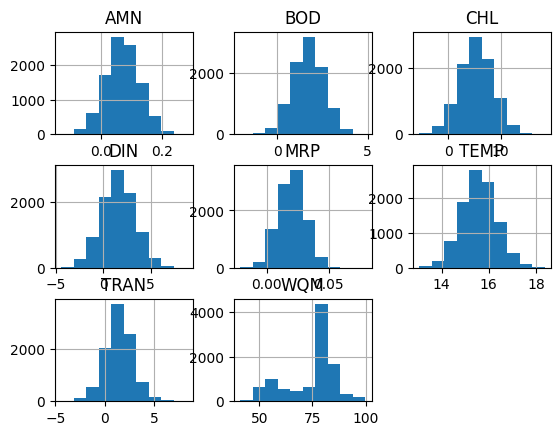

In [13]:
#Building Histogram from Data to check for skewness in data
UniqueDataFile.hist()

array([[<Axes: title={'center': 'AMN'}>, <Axes: title={'center': 'BOD'}>,
        <Axes: title={'center': 'CHL'}>],
       [<Axes: title={'center': 'DIN'}>, <Axes: title={'center': 'MRP'}>,
        <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'TRAN'}>,
        <Axes: title={'center': 'WQM'}>, <Axes: >]], dtype=object)

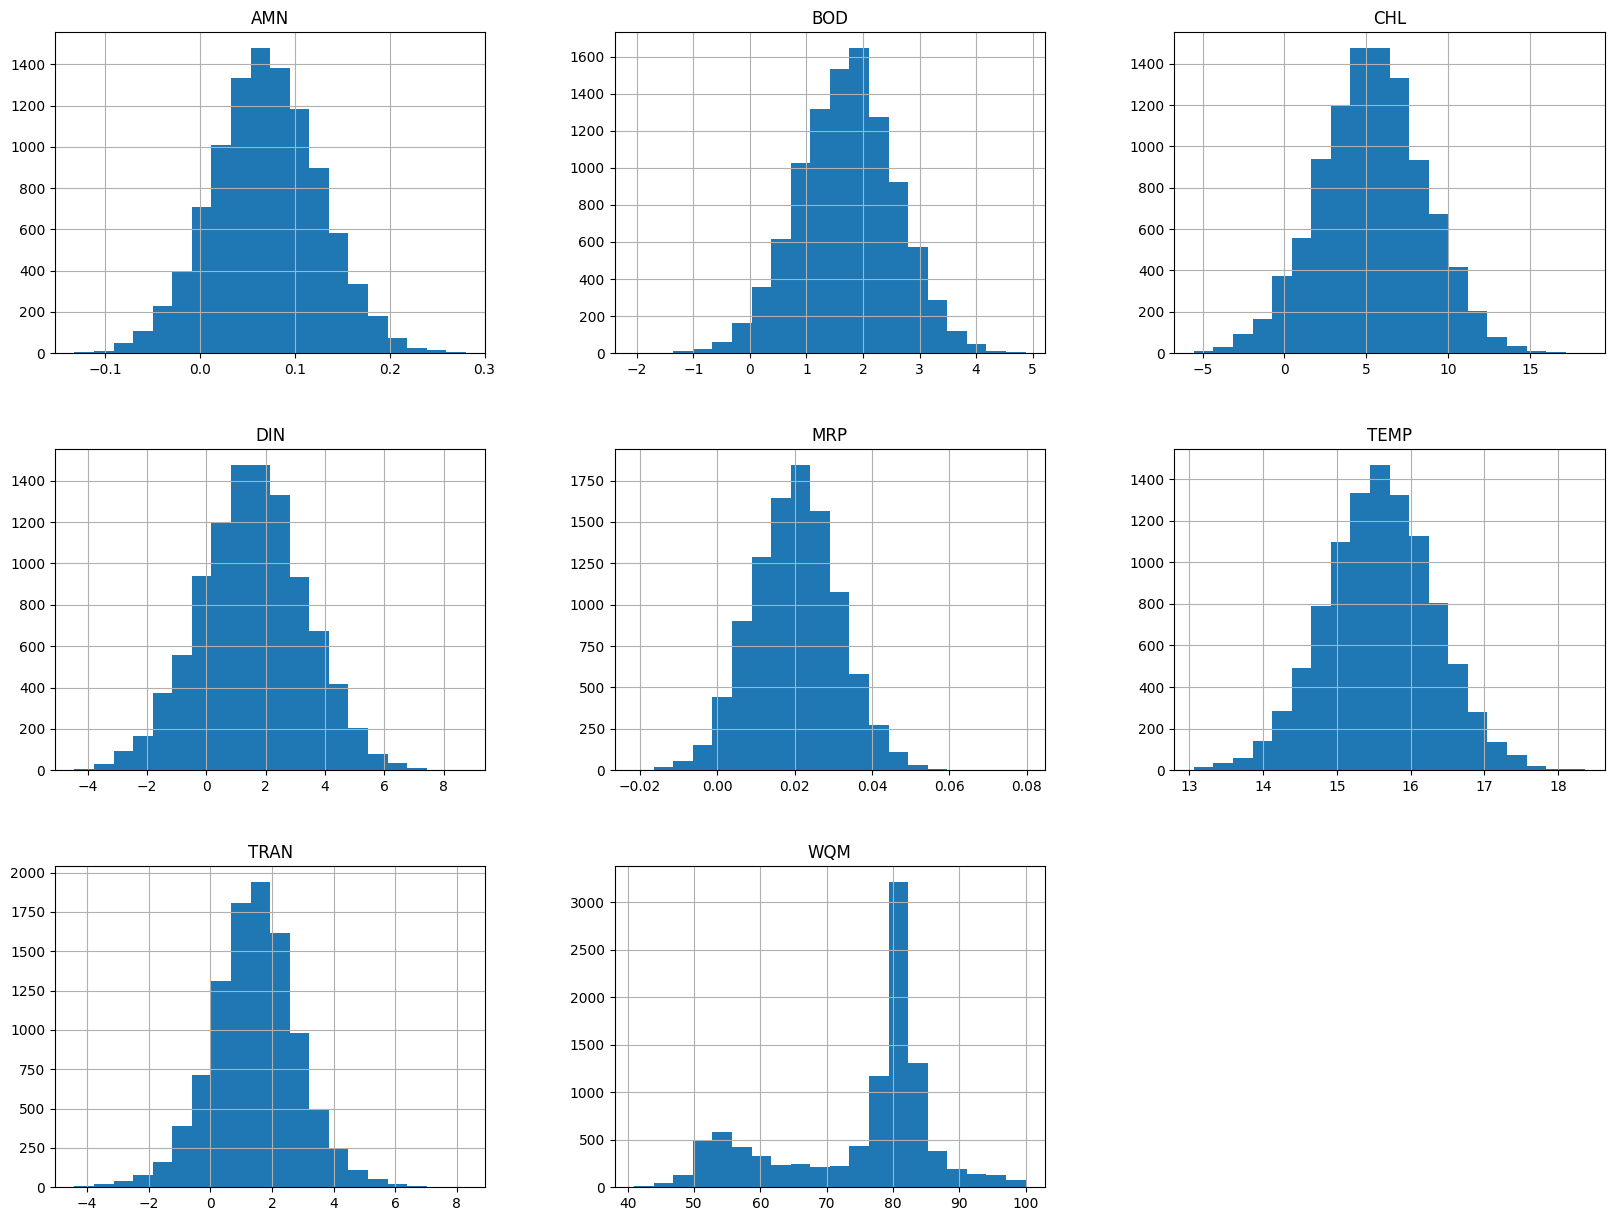

In [14]:
#Box Plots also help visualize data variability and distribution and also check for outliers in the data

UniqueDataFile.hist(bins = 20, figsize=(20,15))

REMOVING OUTLIERS


In [15]:
UniqueDataFile.columns

Index(['AMN', 'BOD', 'CHL', 'DIN', 'MRP', 'TEMP', 'TRAN', 'WQM'], dtype='object')

In [16]:
datafile['AMN']


0        0.0547
1        0.0975
2        0.0285
3        0.0354
4        0.0354
          ...  
10018    0.1964
10019    0.0185
10020    0.0123
10021    0.0613
10022    0.0992
Name: AMN, Length: 10023, dtype: float64

In [17]:
datafile['BOD']

0        2.7414
1       -0.1555
2        1.8100
3        2.3163
4        2.3163
          ...  
10018    2.5177
10019    1.3208
10020    0.8134
10021    1.1147
10022    2.0890
Name: BOD, Length: 10023, dtype: float64

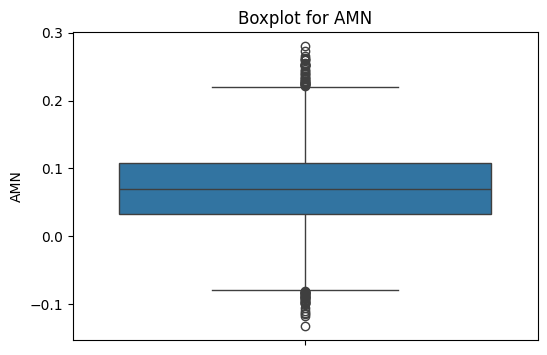

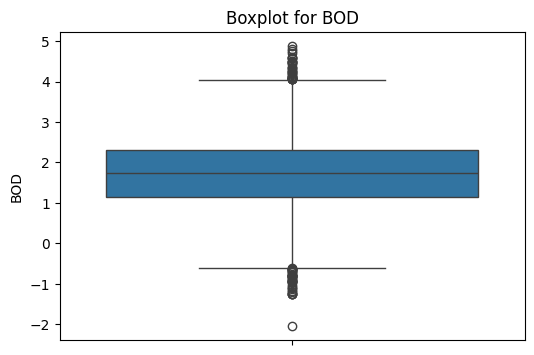

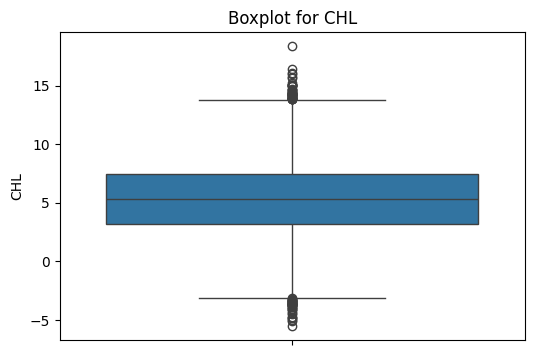

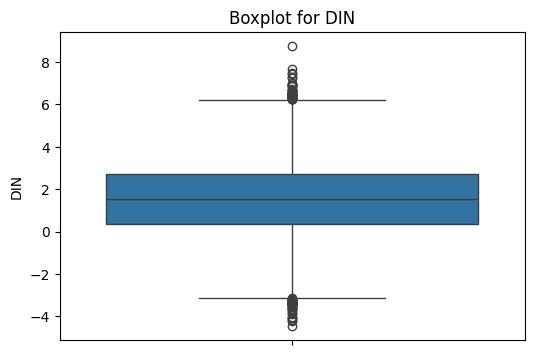

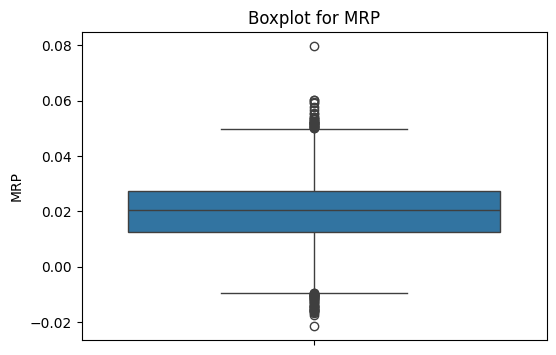

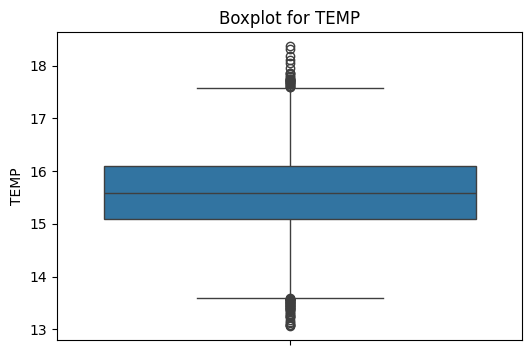

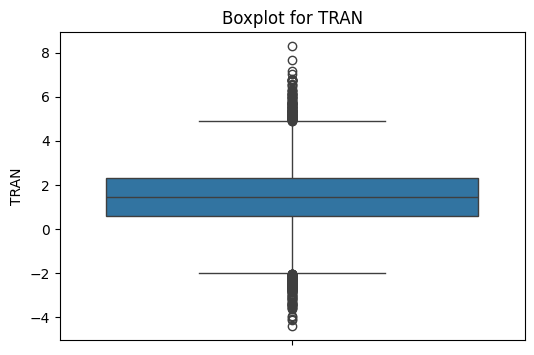

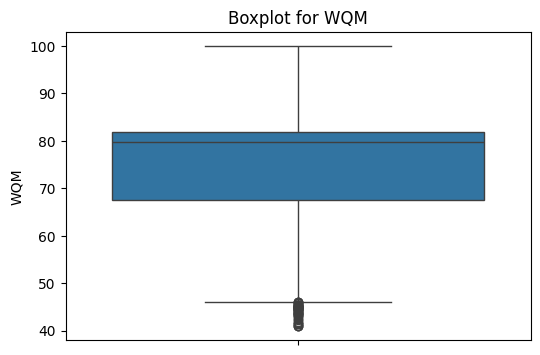

In [18]:
#Remove Outliers Using Inter Quartile Range

for column in UniqueDataFile.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=UniqueDataFile[column])
  plt.title(f'Boxplot for {column}')
  plt.ylabel(column)
  plt.show()

In [19]:
#Remove Outliers

def remove_outliers_iqr (datafile):
  for col in datafile.columns:

    Q1 = datafile[col].quantile(0.25)
    Q3 = datafile[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    datafile = datafile[(datafile[col]>=lower_bound) & (datafile[col]<=upper_bound)]

  return datafile


datafile_no_outliers = remove_outliers_iqr(UniqueDataFile)

datafile_no_outliers

AMN     BOD      CHL     DIN     MRP     TEMP    TRAN    WQM
0      0.0547  2.7414   0.3918 -1.1843  0.0138  15.3787 -0.7015  59.96
1      0.0975 -0.1555   3.3506  0.4513  0.0179  15.3255  0.7867  80.38
2      0.0285  1.8100   0.9376 -0.8826  0.0213  16.6987  0.6579  71.40
4      0.0354  2.3163   2.7961  0.1448  0.0271  14.3391  1.3615  95.40
5      0.0290  1.2430   9.2195  3.6956  0.0218  15.8452 -0.4257  51.95
...       ...     ...      ...     ...     ...      ...     ...    ...
10014  0.1151  3.1513  10.7687  4.5520  0.0405  15.0310  0.3241  52.27
10015  0.0377  1.6827   3.1626  0.3474  0.0210  15.5406  3.2080  91.46
10017  0.2171  1.4146   7.2014  2.5800  0.0033  15.8676 -0.3433  53.63
10018  0.1964  2.5177   5.5248  1.6532  0.0382  15.2260  1.2929  79.67
10019  0.0185  1.3208   8.2974  3.1859  0.0233  14.0154  0.6657  66.22

[9292 rows x 8 columns]

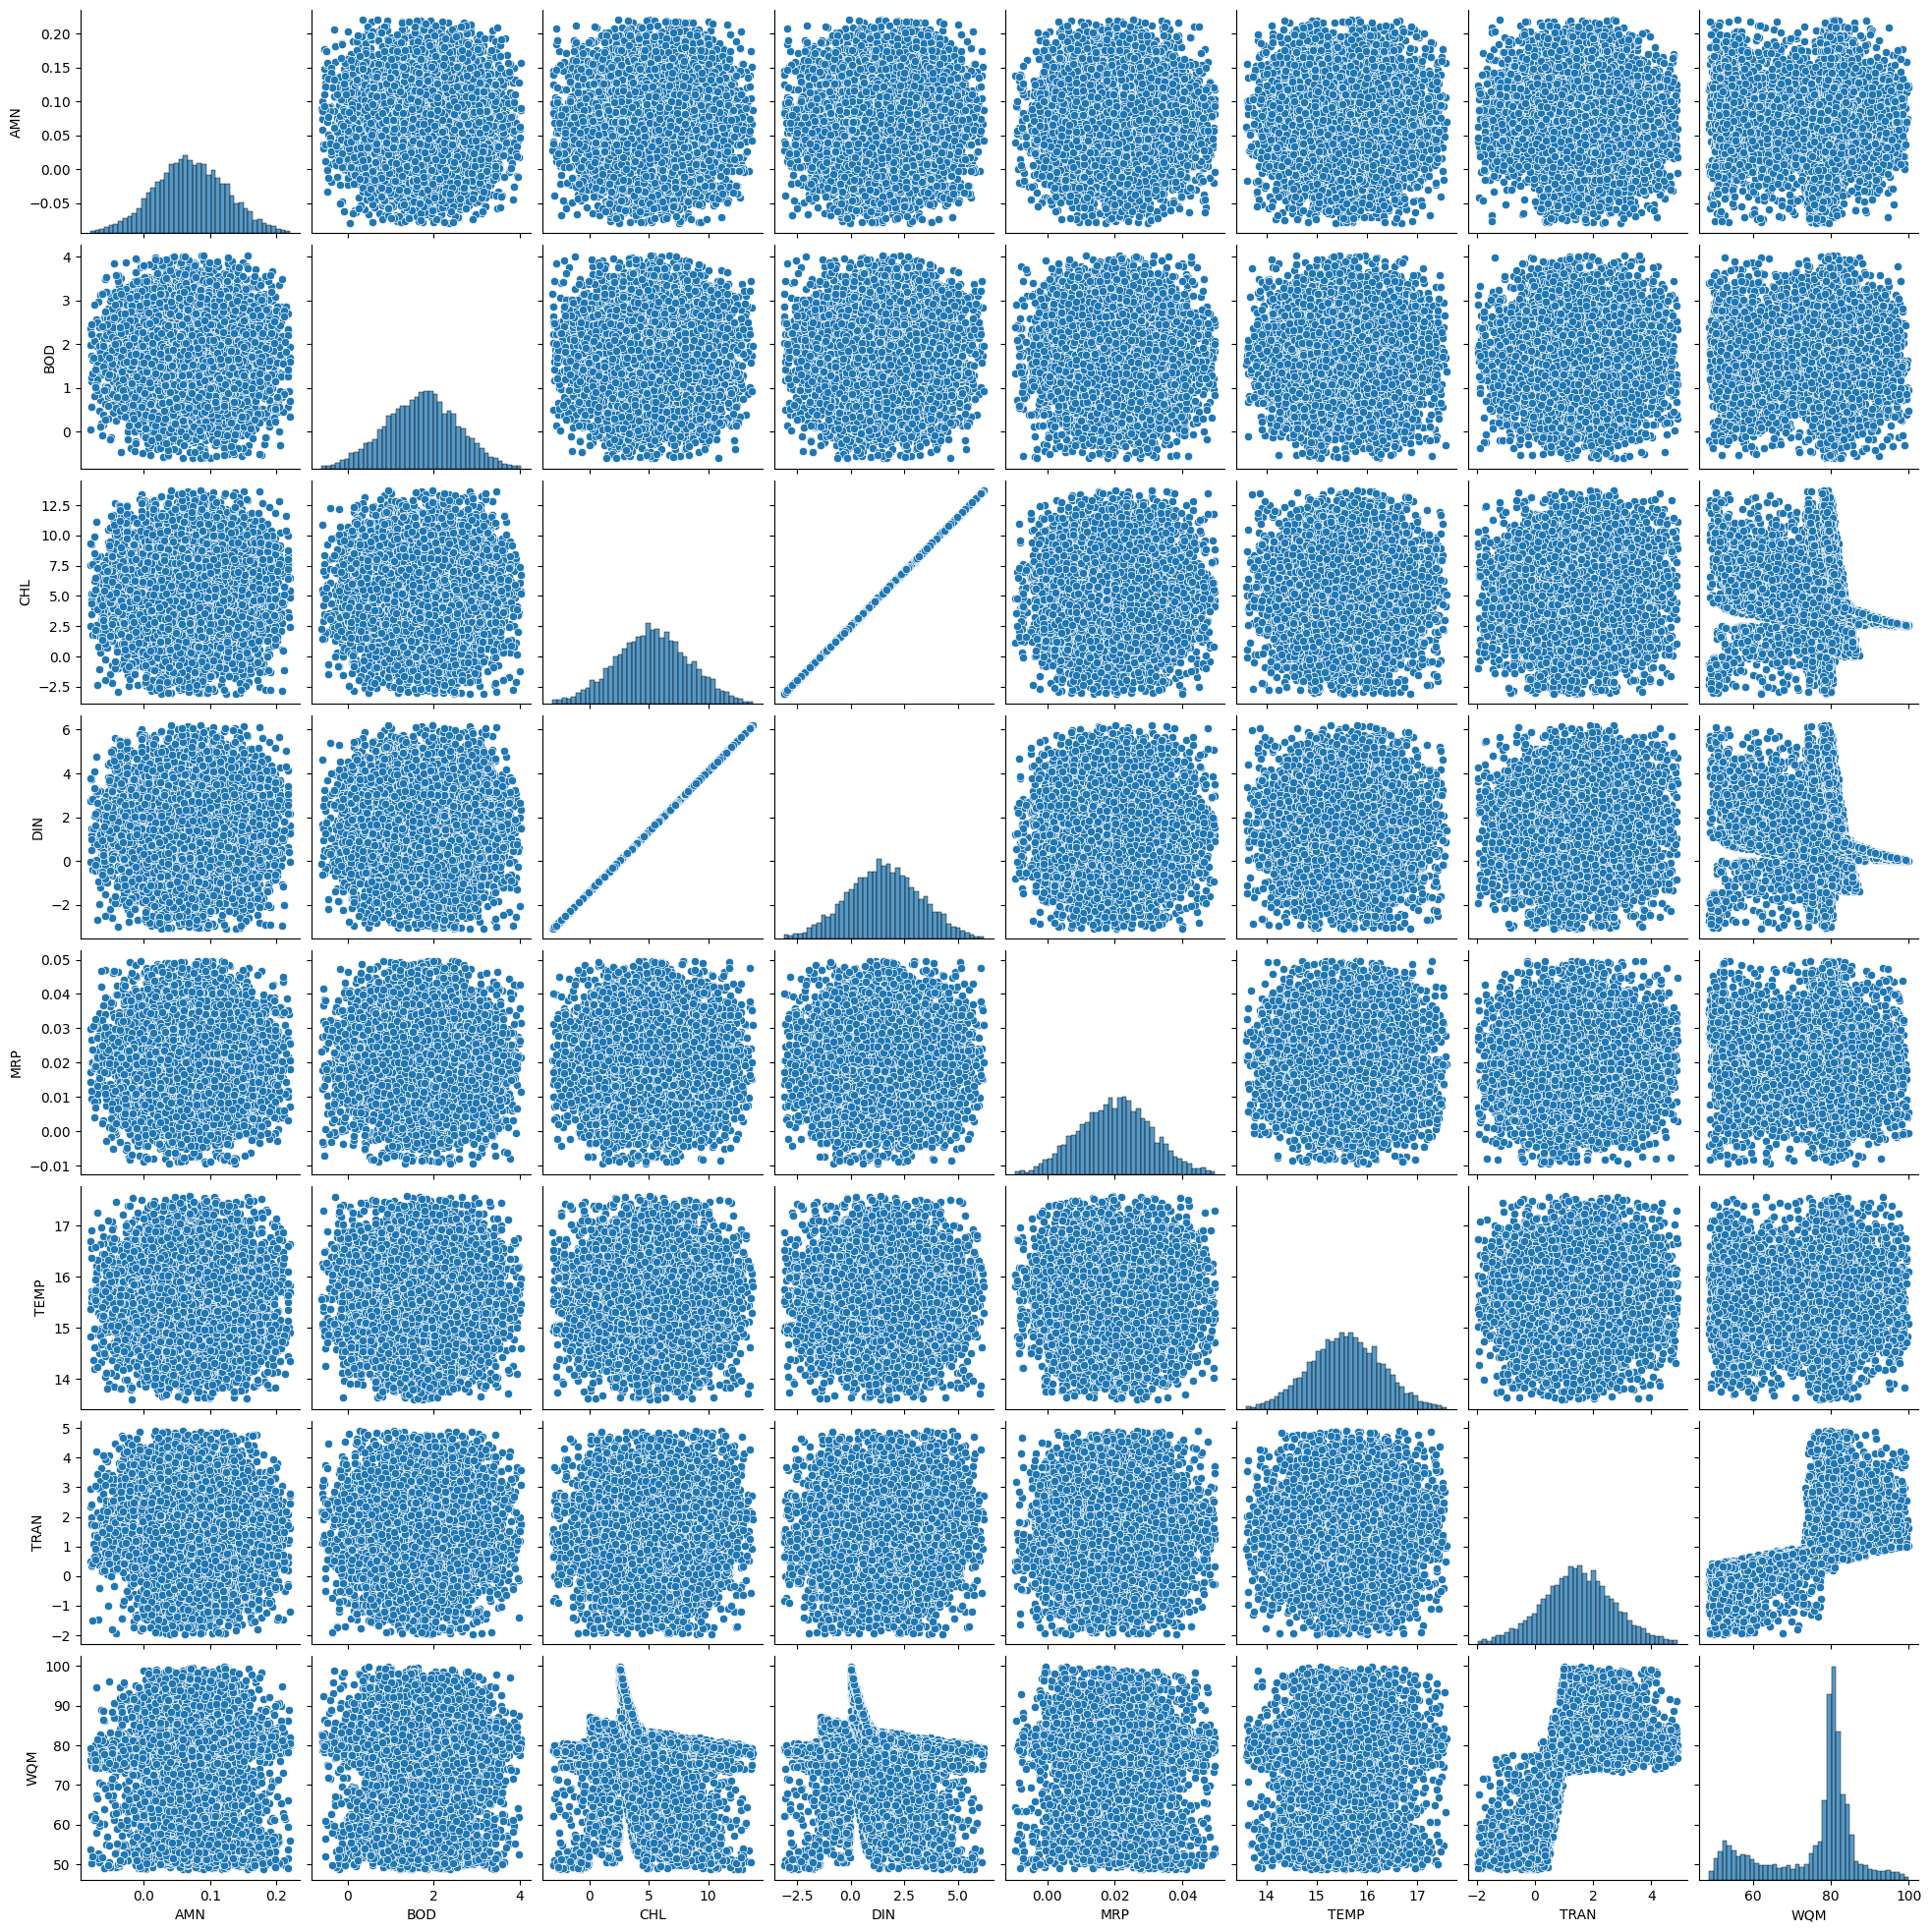

In [20]:
# Scatter plot matrix
sns.pairplot(datafile_no_outliers)

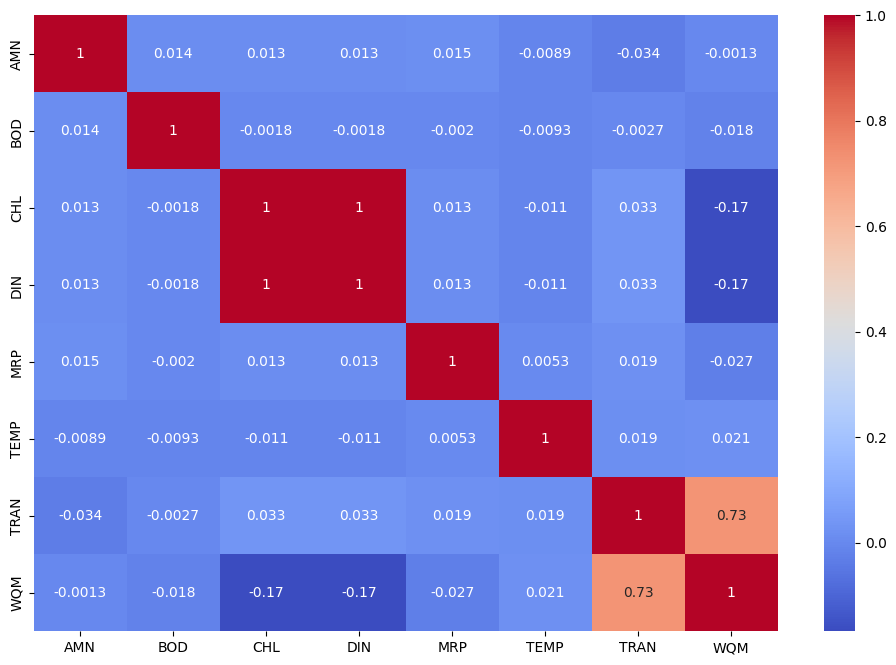

In [21]:
# Correlation matrix
corr_matrix = datafile_no_outliers.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Removing the 'DIN' column as it has perfect correlation with CHL
datafile_no_outliers = datafile_no_outliers.drop(columns=['DIN'])

# Display the dataframe to ensure the column was removed
datafile_no_outliers

AMN     BOD      CHL     MRP     TEMP    TRAN    WQM
0      0.0547  2.7414   0.3918  0.0138  15.3787 -0.7015  59.96
1      0.0975 -0.1555   3.3506  0.0179  15.3255  0.7867  80.38
2      0.0285  1.8100   0.9376  0.0213  16.6987  0.6579  71.40
4      0.0354  2.3163   2.7961  0.0271  14.3391  1.3615  95.40
5      0.0290  1.2430   9.2195  0.0218  15.8452 -0.4257  51.95
...       ...     ...      ...     ...      ...     ...    ...
10014  0.1151  3.1513  10.7687  0.0405  15.0310  0.3241  52.27
10015  0.0377  1.6827   3.1626  0.0210  15.5406  3.2080  91.46
10017  0.2171  1.4146   7.2014  0.0033  15.8676 -0.3433  53.63
10018  0.1964  2.5177   5.5248  0.0382  15.2260  1.2929  79.67
10019  0.0185  1.3208   8.2974  0.0233  14.0154  0.6657  66.22

[9292 rows x 7 columns]

In [23]:
# Now, normalizing the features
# We will be using MinMaxScaler for our task
from sklearn.preprocessing import MinMaxScaler

# Separate the features and target variable
features = datafile_no_outliers.drop(['WQM'], axis=1)
target = datafile_no_outliers['WQM']

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)
# Converting scaled features back to DataFrame
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled DataFrame
scaled_features

AMN       BOD       CHL       MRP      TEMP      TRAN
0     0.448483  0.720997  0.206070  0.393581  0.446301  0.184736
1     0.591197  0.098743  0.382172  0.462838  0.432917  0.401280
2     0.361120  0.520932  0.238555  0.520270  0.778384  0.382539
3     0.384128  0.629685  0.349169  0.618243  0.184759  0.484918
4     0.362788  0.399141  0.731478  0.528716  0.563662  0.224867
...        ...       ...       ...       ...       ...       ...
9287  0.649883  0.809043  0.823683  0.844595  0.358827  0.333969
9288  0.391797  0.493588  0.370983  0.515203  0.487031  0.753598
9289  0.989997  0.436000  0.611364  0.216216  0.569297  0.236857
9290  0.920974  0.672946  0.511576  0.805743  0.407884  0.474936
9291  0.327776  0.415852  0.676596  0.554054  0.103323  0.383674

[9292 rows x 6 columns]

In [24]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X = scaled_features.copy(deep=True)
y = target.copy(deep=True)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

# Display the shapes of the train and test sets
print(f"X_train_shape: {X_train.shape}")
print(f"X_testshape: {X_test.shape}")

print(f"y_train_shape: {y_train.shape}")
print(f"y_testshape: {y_test.shape}")

X_train_shape: (7433, 6)
X_testshape: (1859, 6)
y_train_shape: (7433,)
y_testshape: (1859,)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Function to evaluate predictions
def evaluate_predictions (y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return mae, mse, rmse, mape, r2

# Function to print results
def print_results(metrics, dataset_type):
  mae, mse, rmse, mape, r2 = metrics
  print(f'{dataset_type} MAE = {round(mae, 3)}')
  print(f'{dataset_type} MSE = {round(mse, 3)}')
  print(f'{dataset_type} RMSE = {round(rmse, 3)}')
  print(f'{dataset_type} MAPE = {round(mape, 3)}%')  # this is in percentage
  print(f'{dataset_type} R2 = {round(r2, 3)}%\n')   # this is in percentage

In [26]:
# Helper function to create scatter plots
def create_scatter_plot(ax, x, y, title, r2_score, color):
  ax.scatter(x, y, color = color)
  ax.plot([min(x), max(x)], [min(x), max(x)], color='green', linestyle = '--')
  ax.set_title(title)
  ax.set_xlabel('Actual values')
  ax.set_ylabel('Predicted values')
  ax.text(0.05, 0.95, f"$R^2$ ={r2_score:.3f}", transform = ax.transAxes, verticalalignment = 'top')

In [27]:
# Import the Linear Regression model and the 4 evaluation metrics from sklearn
from sklearn.linear_model import LinearRegression

# Set a random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# Initializing and training the model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
# Making predictions
y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr = lin_reg.predict(X_test)

y_complete_pred_lr = lin_reg.predict(X)

# Evaluating the model
train_metrics_lr = evaluate_predictions(y_train, y_train_pred_lr)
test_metrics_lr = evaluate_predictions(y_test, y_test_pred_lr)

complete_metrics_lr = evaluate_predictions(y, y_complete_pred_lr)

# Printing the results
print_results(train_metrics_lr , 'Train_lr')
print_results(test_metrics_lr , 'Test_lr')
print_results(complete_metrics_lr , 'Complete dataset_lr')

Train_lr MAE = 6.133
Train_lr MSE = 55.348
Train_lr RMSE = 7.44
Train_lr MAPE = 0.085%
Train_lr R2 = 0.571%

Test_lr MAE = 6.324
Test_lr MSE = 57.864
Test_lr RMSE = 7.607
Test_lr MAPE = 0.088%
Test_lr R2 = 0.546%

Complete dataset_lr MAE = 6.171
Complete dataset_lr MSE = 55.852
Complete dataset_lr RMSE = 7.473
Complete dataset_lr MAPE = 0.086%
Complete dataset_lr R2 = 0.566%



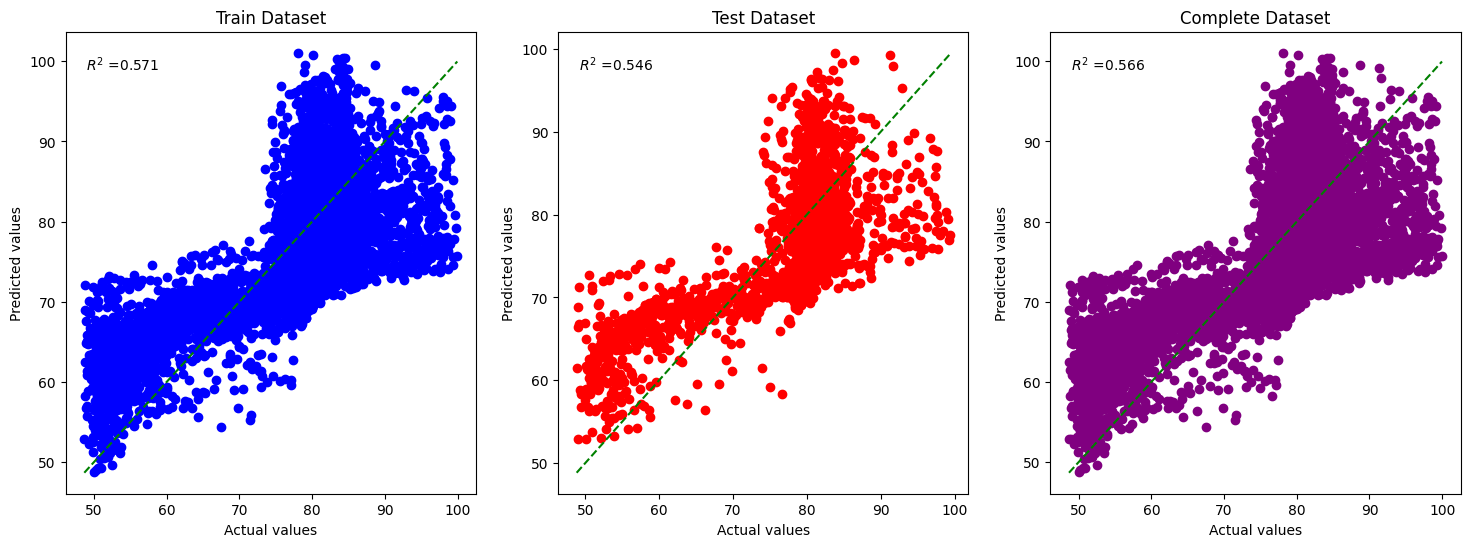

In [29]:
# Creating the scatter plots
fig, axs = plt.subplots(1,3, figsize=(18,6))

# Train dataset plot
create_scatter_plot(axs[0], y_train, y_train_pred_lr, 'Train Dataset', train_metrics_lr[4], color='blue')

# Test dataset plot
create_scatter_plot(axs[1], y_test, y_test_pred_lr, 'Test Dataset', test_metrics_lr[4], color='red')

# Complete dataset plot
create_scatter_plot(axs[2], y, y_complete_pred_lr, 'Complete Dataset', complete_metrics_lr[4], color='purple')

# Show the plots